# **A. BACKGROUND OF THE STUDY CASE**
___
The company has assigned a task to identify suitable operational vehicles for its fleet and has decided that the vehicles will be used BMW pre-owned cars for a period of 2 years. The procurement decision is made strategically, focusing on factors such as price, vehicle age, fuel efficiency, and mileage. In addition to meeting functional needs, the procurement process also considers economic efficiency, including the potential depreciation of the vehicle's value once the usage period ends.

The company also set a budget of **£150,000** for the procurement of these 5 vehicles. Due to the growing awareness of energy efficiency and environmental sustainability in the UK, the company plans to choose vehicles based on their fuel type. The fleet should consist of the following composition:

1. **3 BMW NON-EV Units**
2. **1 BMW Hybrid Unit**
3. **1 BMW Electric Unit**

The selection process will focus on these three fuel types, while the analysis will also prioritize calculating the price and fuel type to minimize depreciation, thus reducing potential asset loss when the vehicles are resold at the end of their usage period.

Additionally, the company has defined three price categories to optimize fleet procurement within the allocated budget:

- **Low Price Category**: £15,000
- **Medium Price Category**: £30,000
- **High Price Category**: £45,000

Vehicles that fall within these price ranges will be classified accordingly as **cheap**, **medium**, or **expensive**.

Using the *SMART Framework*, the analyst will manage the project to ensure that it progresses in a structured and effective manner. Below is the detailed SMART framework.

### **SMART FRAMEWORK**
___

**PROBLEM STATEMENT**:  
The selection of 5 used BMW vehicles for the company fleet, consisting of 3 NON-EV units, 1 Hybrid unit, and 1 Electric Vehicle unit, with optimal performance for 3 years of usage, to avoid significant depreciation when reselling after the usage period ends, and ensuring that the total budget does not exceed £150,000.

- **Specific**: Analyzing the most optimal BMW products in the UK by evaluating the price, performance, and fuel type to recommend the best options for company vehicle procurement.
- **Measure**: The composition of 5 BMW units includes 3 NON-EV units, 1 Hybrid unit, and 1 Electric Vehicle unit, with considerations of price and unit quality to avoid excessive depreciation. Additionally, price categories (cheap, medium, and expensive) are defined as £15,000, £30,000, and £45,000 respectively.
- **Achievable**: Conducting an analysis based on a dataset of BMW listings in the UK. The analysis will be performed using Python and Tableau to process, extract, and display data based on insights.
- **Relevant**: Analyzing used BMW listings in the UK by factors such as price, year of manufacture, fuel type, tax price, fuel efficiency on specific distances, and vehicle mileage.
- **Time Bound**: Analyze and evaluate the data within one week to assess the compatibility of the above metrics in selecting the most optimal 5 used cars within the £150,000 budget.

### **PROBLEM EXPLANATION**
___
Based on the problem statement above, six key issues have been identified for further analysis:

1. Average price per fuel type.
2. Average mileage per fuel type.
3. Average mpg (miles per gallon) per fuel type.
4. Categorizing prices (cheap, medium, expensive) by car type and year of manufacture. The price categories are defined as **£15,000**, **£30,000**, and **£45,000**.
5. Minimum and maximum profit for the top 5 models of each fuel type.
6. The relationship between price per fuel type and mileage per fuel type.


# **B. IMPORT LIBRARIES**
___
By importing these libraries, we can easily perform tasks like data cleaning, analysis, visualization, and modeling, ensuring an efficient process for solving the problem statement.

In [13]:
# Importing libraries and packages required for data manipulation, statistical calculations, and data visualization.

import pandas as pd  
import numpy as np 
from scipy import stats  
import matplotlib.pyplot as plt 
import seaborn as sns  
import eda_package as ep
import warnings

# **C. DATA UNDERSTADING & DATA CLEANING**
___
Preparing and analyzing raw data by handling inconsistencies values, followed by the application of various statistical and graphical techniques to understand the underlying patterns and relationships in the data.

In [2]:
# Reading the CSV file from the Kaggle website.
# Using the 'skipinitialspace' parameter to remove spaces after commas.
df = pd.read_csv('bmw.csv', skipinitialspace=True).reset_index(drop=True)
df.columns = df.columns.str.strip()  

In [3]:
ep.data_explore(df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


=== Missing & Unique Values ===


,Column,Missing Value Count,Unique Value Count,Unique Items
0,model,0 (0.00%),24,"[5 Series, 6 Series, 1 Series, 7 Series, 2 Ser..."
1,year,0 (0.00%),25,"[2014, 2018, 2016, 2017, 2015, 2019, 2013, 202..."
2,price,0 (0.00%),3777,"[11200, 27000, 16000, 12750, 14500, 14900, 162..."
3,transmission,0 (0.00%),3,"[Automatic, Manual, Semi-Auto]"
4,mileage,0 (0.00%),8086,"[67068, 14827, 62794, 26676, 39554, 35309, 385..."
5,fuelType,0 (0.00%),5,"[Diesel, Petrol, Other, Hybrid, Electric]"
6,tax,0 (0.00%),38,"[125, 145, 160, 30, 20, 135, 0, 165, 200, 150,..."
7,mpg,0 (0.00%),102,"[57.6, 42.8, 51.4, 72.4, 50.4, 60.1, 52.3, 62...."
8,engineSize,0 (0.00%),17,"[2.0, 3.0, 1.5, 0.6, 1.6, 4.4, 0.0, 2.2, 2.5, ..."



=== Duplicate Values & Total Rows ===


,Category,Count,Percentage
0,Duplicate Rows Count,117,1.085243
1,Total Rows Count,10781,100.000000


In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [6]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0
10780,X1,2017,15981,Automatic,59432,Diesel,125,57.6,2.0


In [ ]:
# Menghapus nilai Other pada kolom model
df = df[~df['fuelType'].str.contains('Other', na=False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10745 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10745 non-null  object 
 1   year          10745 non-null  int64  
 2   price         10745 non-null  int64  
 3   transmission  10745 non-null  object 
 4   mileage       10745 non-null  int64  
 5   fuelType      10745 non-null  object 
 6   tax           10745 non-null  int64  
 7   mpg           10745 non-null  float64
 8   engineSize    10745 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 839.5+ KB


**Here are some key insights based on the descriptive statistics from the dataset:**

* There are no null values.
* Duplicated values refer to categorical features such as car model and year of manufacture.
* Numerical variables show variation in price and other metrics, while categorical variables (such as fuel type and model) help classify cars into distinct groups.
* The "`Other`" category represents unidentified fuel types in the dataset. To focus the analysis on NON-EV, Electric, and Hybrid cars, we have to  removed all rows with "Other" values, bringing the total number of rows to 10,745.
* The columns `tax` and `engineSize` contain 0 values of integer type. Assume the 0 tax value indicates expired tax, or it could be erroneous data during registration, or it could refer to tax-exempt vehicles owned by government agencies.

# **D. EXPLORATORY DATA ANALYSYS**
___
The data analysis focuses on addressing the six key points outlined in the problem statement section.

## **1. Average Price by Fuel Type**
___
Identifying the average car price based on fuel type to determine which fuel type offers the most cost-effective option for purchase.

,fuelType,price
0,Other,18193.861111
1,Electric,18466.000000
2,Diesel,21779.262986
3,Petrol,24360.271583
4,Hybrid,27169.714765


C:\Users\rafiu\AppData\Local\Temp\ipykernel_23260\3234136650.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.fuelType, y=avg_price.price, palette='viridis')


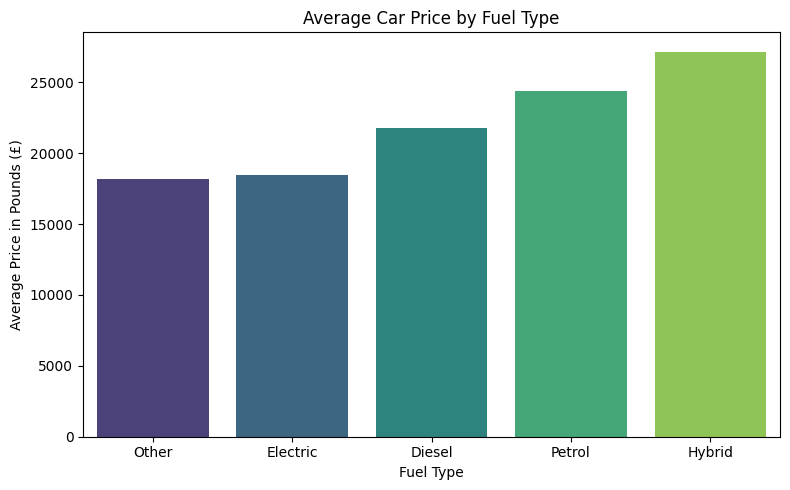

In [14]:
# Grouping by 'fuelType' and calculating the average price
# Sorting the values from lowest to highest
# Resetting index and saving the result in 'avg_price'

avg_price = df.groupby('fuelType')['price'].mean().sort_values().reset_index(drop=False)
display(avg_price)

# Visualizing the data using seaborn and matplotlib
# Initializing figure size for bar plot
# Plotting the distribution of car prices from lowest to highest
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price.fuelType, y=avg_price.price, palette='viridis')
plt.title('Average Car Price by Fuel Type')
plt.ylabel('Average Price in Pounds (£)')
plt.xlabel('Fuel Type')
plt.tight_layout()
plt.show()


**Here are several insights we gathered regarding the mean of price per fuel type:**

- The average price of an **electric car** is **£18,466**.
- The average price of a **diesel car** is **£21,779.26**.
- The average price of a **petrol car** is **£24,360.27**.
- The average price of a **hybrid car** is **£27,169.71**.
- The **cheapest** car, on average, is the **electric car**.
- The **most expensive** car, on average, is the **hybrid car**.

Based on the current data distribution, it is more cost-effective to purchase **3 diesel cars** compared to **3 petrol cars**. Therefore, further analysis is necessary on the average mileage to identify vehicles that are not used as frequently.

## **2. Average Mileage by Fuel Type**
___
Identifying the average mileage of cars based on fuel type to understand the trend of cars that are less frequently used, making it more cost-effective for purchase in terms of car performance and future unit turnover.

In [ ]:
# Grouping by 'fuelType' and aggregating the average mileage
# Sorting the values from smallest to largest
# Resetting the index and saving the result in 'avg_mileage'

avg_mileage = df.groupby('fuelType')['mileage'].mean().sort_values().reset_index(drop=False)
display(avg_mileage)

# Visualizing the data using seaborn and matplotlib
# Initializing the figure and its size for bar plot
# Using barplot to display the distribution of mileage from lowest to highest

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_mileage.fuelType, y=avg_mileage.mileage, palette='viridis')
plt.title('Average Mileage per Fuel Type')
plt.ylabel('Mileage')
plt.xlabel('Fuel Type')
plt.tight_layout()
plt.show()

,fuelType,mileage
0,Petrol,16524.097454
1,Electric,19925.333333
2,Hybrid,23400.530201
3,Diesel,29852.804042
4,Other,44760.638889


**Here are several insights we gathered regarding the mean of mileage per fuel type:**

- The average mileage of an **electric car** is **19,925.33 miles**.
- The average mileage of a **diesel car** is **29,852.80 miles**.
- The average mileage of a **petrol car** is **16,524.10 miles**.
- The average mileage of a **hybrid car** is **23,400.53 miles**.
- The car with the **shortest** average mileage is the **petrol car**.
- The car with the **longest** average mileage is the **diesel car**.

When comparing the average price distribution, a new consideration arises where it would be more advantageous to purchase a petrol car based on its mileage. Therefore, further analysis is needed on the average miles per gallon data to identify vehicles with higher fuel efficiency.


## **4. Average Miles Per Gallon per Fuel Type**
___
Identifying the average Miles per Gallon (MPG) data to measure the fuel efficiency of cars based on fuel type, in order to assess the fuel consumption level of each fuel type.

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2 Series,2020,25998,Automatic,3160,Hybrid,140,113.0,1.5
1,X5,2016,34498,Automatic,17303,Hybrid,0,85.6,2.0
2,3 Series,2016,16998,Semi-Auto,43695,Hybrid,0,134.5,2.0
3,i8,2016,48998,Automatic,10087,Hybrid,0,134.5,1.5
4,3 Series,2017,18298,Semi-Auto,33384,Hybrid,0,134.5,2.0
...,...,...,...,...,...,...,...,...,...
293,7 Series,2019,49000,Automatic,2000,Hybrid,135,113.0,2.0
294,5 Series,2018,26790,Automatic,20000,Hybrid,140,156.9,2.0
295,5 Series,2017,23880,Automatic,6002,Hybrid,140,156.9,2.0
296,X5,2019,65000,Automatic,7374,Hybrid,140,188.3,3.0


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,i3,2017,18999,Automatic,20321,Electric,135,470.8,0.0
1,i3,2016,18999,Automatic,9990,Electric,0,470.8,0.0
2,i3,2015,17400,Automatic,29465,Electric,0,470.8,1.0


C:\Users\rafiu\AppData\Local\Temp\ipykernel_23260\2576829458.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_mpg.fuelType, y=avg_mpg.mpg, palette='viridis')


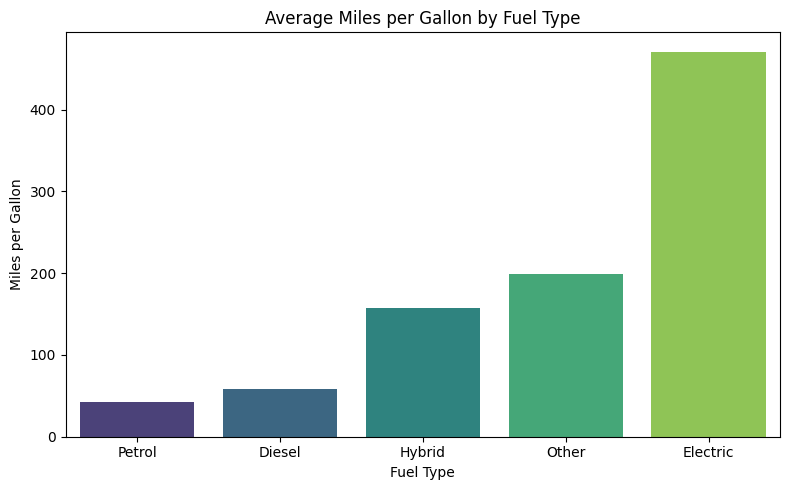

In [18]:
# Using the groupby function on the 'fuelType' column to aggregate the average miles per gallon.
# Sorting the values from smallest to largest.
# Resetting index after sorting.
# Storing the result in the avg_mileage object.
avg_mpg = df.groupby('fuelType')['mpg'].mean().sort_values().reset_index(drop=False)
avg_mpg

# Viewing the data distribution of MPG for Hybrid and Electric types.

hybrid_cars = df[df['fuelType'] == 'Hybrid'].reset_index(drop=True)
electric_cars = df[df['fuelType'] == 'Electric'].reset_index(drop=True)

display(hybrid_cars)
display(electric_cars)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_mpg.fuelType, y=avg_mpg.mpg, palette='viridis')
plt.title('Average Miles per Gallon by Fuel Type')
plt.ylabel('Miles per Gallon')
plt.xlabel('Fuel Type')
plt.tight_layout()
plt.show()


**Here are several insights we gathered regarding the mean of MPG per fuel type:**
- The average MPG for **electric cars** is **470.8**.
- The average MPG for **diesel cars** is **58.9**.
- The average MPG for **petrol cars** is **42.8**.
- The average MPG for **hybrid cars** is **134.5**.
- The car with the highest average MPG is the **electric car**.
- The car with the lowest average MPG is the **hybrid car**.

When comparing the average price with the average mileage, the data distribution shows that **petrol cars** are more cost-effective and less fuel-consuming than **diesel cars** across all metrics. However, given that there are only three **electric car** variants, they will likely be selected for purchase without considering the MPG requirement.


## **4. Kategori Harga Mobil Per Keluaran Tahun**
___

Model mobil BMW mana yang paling banyak tersedia dalam dataset berdasarkan kategori harga. Saya membagi tiap kategori dengan menggunakan nilai quartile 1, 2, dan 3 dengan tipe kategori murah, sedang, dan mahal. 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Buat kategori harga berdasarkan kuartil
df['kategori_harga'] = pd.qcut(
    df['price'],
    q=3,
    labels=['Murah', 'Sedang', 'Mahal']
)

df['model_tahun'] = df['model'] + ' - ' + df['year'].astype(str)

df['model_tahun_fuel'] = (df['model_tahun'] + ' (' + df['fuelType'] + ')')

# Hitung jumlah per kategori_harga dan model_tahun
count_df = (
    df.groupby(['kategori_harga', 'model_tahun'])
    .size()
    .reset_index(name='jumlah')
)

# Ambil fuelType paling umum per kategori_harga dan model_tahun
fuel_mode_df = (
    df.groupby(['kategori_harga', 'model_tahun'])['fuelType']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index(name='fuelType')
)

# Gabungkan jumlah dan fuelType
merged_df = pd.merge(count_df, fuel_mode_df, on=['kategori_harga', 'model_tahun'])

# Ambil top 5 per kategori_harga
top_models_per_category = (
    merged_df.groupby('kategori_harga', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'jumlah'))
    .reset_index(drop=True)
)

# Tambahkan kolom gabungan model_tahun dan fuelType
top_models_per_category['model_tahun_fuel'] = (
    top_models_per_category['model_tahun'] + ' (' + top_models_per_category['fuelType'] + ')'
)
top_models_per_category

C:\Users\rafiu\AppData\Local\Temp\ipykernel_9712\1450179185.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kategori_harga'] = pd.qcut(
C:\Users\rafiu\AppData\Local\Temp\ipykernel_9712\1450179185.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_tahun'] = df['model'] + ' - ' + df['year'].astype(str)
C:\Users\rafiu\AppData\Local\Temp\ipykernel_9712\1450179185.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,kategori_harga,model_tahun,jumlah,fuelType,model_tahun_fuel
0,Murah,1 Series - 2016,380,Diesel,1 Series - 2016 (Diesel)
1,Murah,1 Series - 2017,265,Diesel,1 Series - 2017 (Diesel)
2,Murah,3 Series - 2016,250,Diesel,3 Series - 2016 (Diesel)
3,Murah,3 Series - 2015,210,Diesel,3 Series - 2015 (Diesel)
4,Murah,1 Series - 2015,181,Diesel,1 Series - 2015 (Diesel)
5,Sedang,2 Series - 2019,411,Petrol,2 Series - 2019 (Petrol)
6,Sedang,1 Series - 2019,299,Petrol,1 Series - 2019 (Petrol)
7,Sedang,3 Series - 2017,224,Diesel,3 Series - 2017 (Diesel)
8,Sedang,3 Series - 2018,183,Diesel,3 Series - 2018 (Diesel)
9,Sedang,3 Series - 2019,161,Diesel,3 Series - 2019 (Diesel)


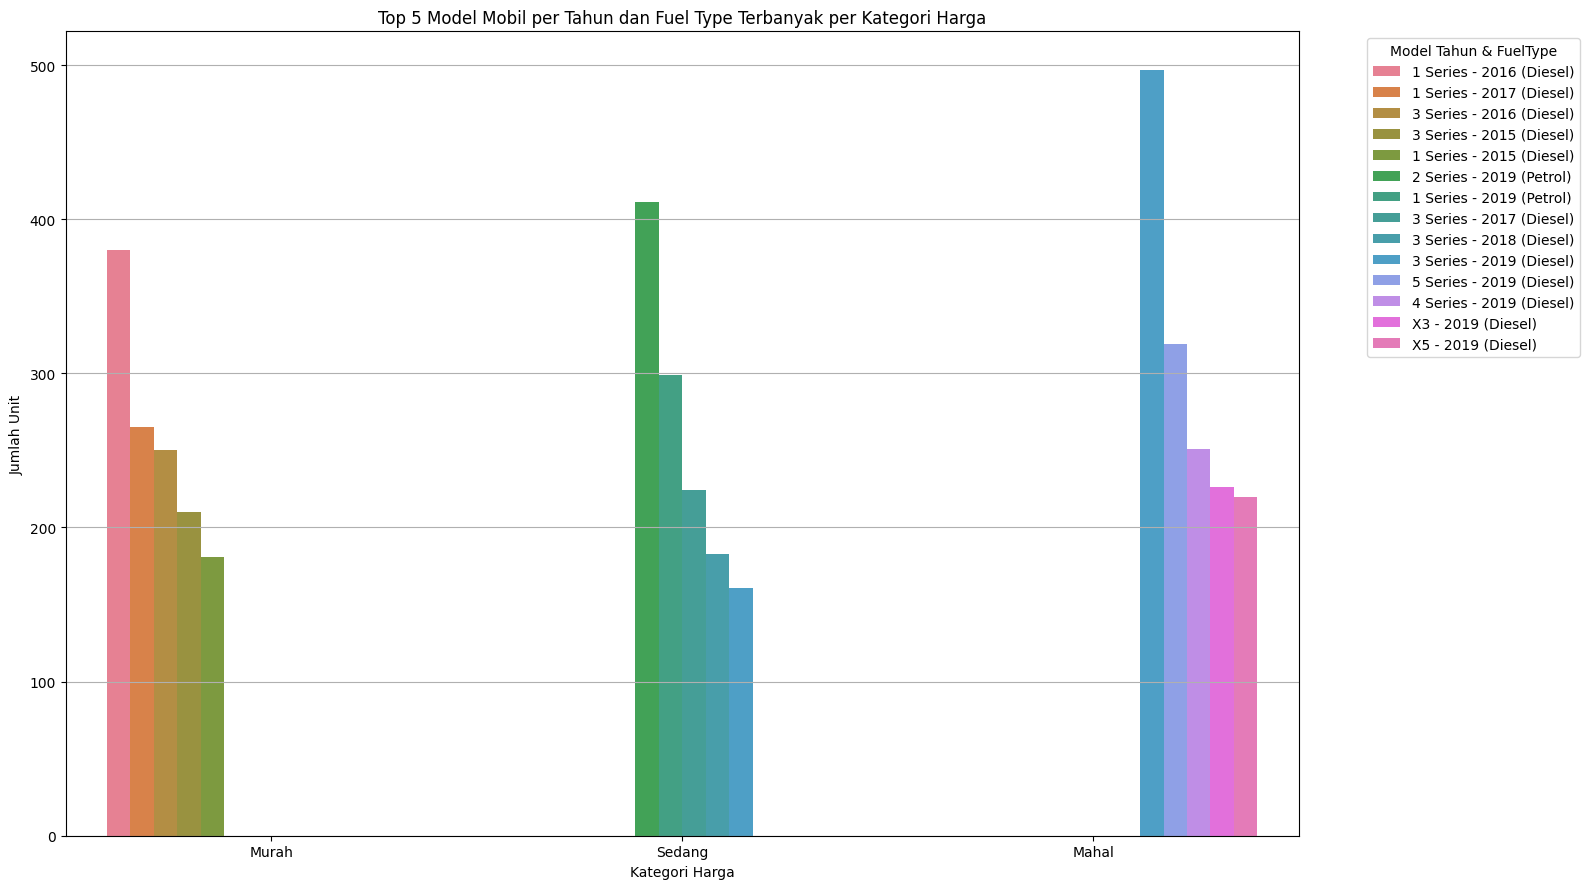

In [18]:
# Visualisasi
plt.figure(figsize=(16, 9))
sns.barplot(
    data=top_models_per_category,
    x='kategori_harga',
    y='jumlah',
    hue='model_tahun_fuel'
)

plt.title('Top 5 Model Mobil per Tahun dan Fuel Type Terbanyak per Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Unit')
plt.legend(title='Model Tahun & FuelType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Kita bisa melihat bahwa persebaran top 5 data mobil BMW yang tersebar pada kategori murah, sedang, sampai mahal. Dengan ini saya bisa melakukan penyortiran data yang lebih baik untuk melakukan 

## **5. Berapa keuntungan minimum dan maksimum data top 5 model mobil pada setiap tipe bahan bakar?**
___

Menggunakan data yang diperoleh pada setiap kategori harga sebelumnya, saya melakukan perhitungan keuntungan yang dapat diperoleh pada setiap jenis mobil per tipe bahan bakar.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Misal: df = pd.read_csv("mobil.csv")

# Ambil top 5 kombinasi model-tahun per fuelType berdasarkan rata-rata harga
top_models_all = {}
for fuel in df['fuelType'].unique():
    df_fuel = df[df['fuelType'] == fuel]
    top_models = (
        df_fuel.groupby(['model', 'year'])['price']
        .mean()
        .sort_values(ascending=False)
        .head(5)
        .index
    )
    top_models_all[fuel] = top_models

# Simpan hasil analisis
summary = []

for fuel, model_years in top_models_all.items():
    for model, year in model_years:
        data = df[(df['fuelType'] == fuel) & (df['model'] == model) & (df['year'] == year)]
        if len(data) <3: continue  # skip jika terlalu sedikit

        prices = data['price']
        mean_price = prices.mean()
        min_price = prices.min()
        max_price = prices.max()
        std_price = prices.std()
        n = len(prices)

        # Hitung 95% confidence interval
        ci_low, ci_high = stats.t.interval(
            confidence=0.95,
            df=n-1,
            loc=mean_price,
            scale=stats.sem(prices)
        )

        summary.append({
            'fuelType': fuel,
            'model': f"{model} - {year} - {fuel}",
            'mean_price': mean_price,
            'min_price': min_price,
            'max_price': max_price,
            'range': max_price - min_price,
            'ci_low': ci_low,
            'ci_high': ci_high,
            'count': n
        })

df_summary = pd.DataFrame(summary)

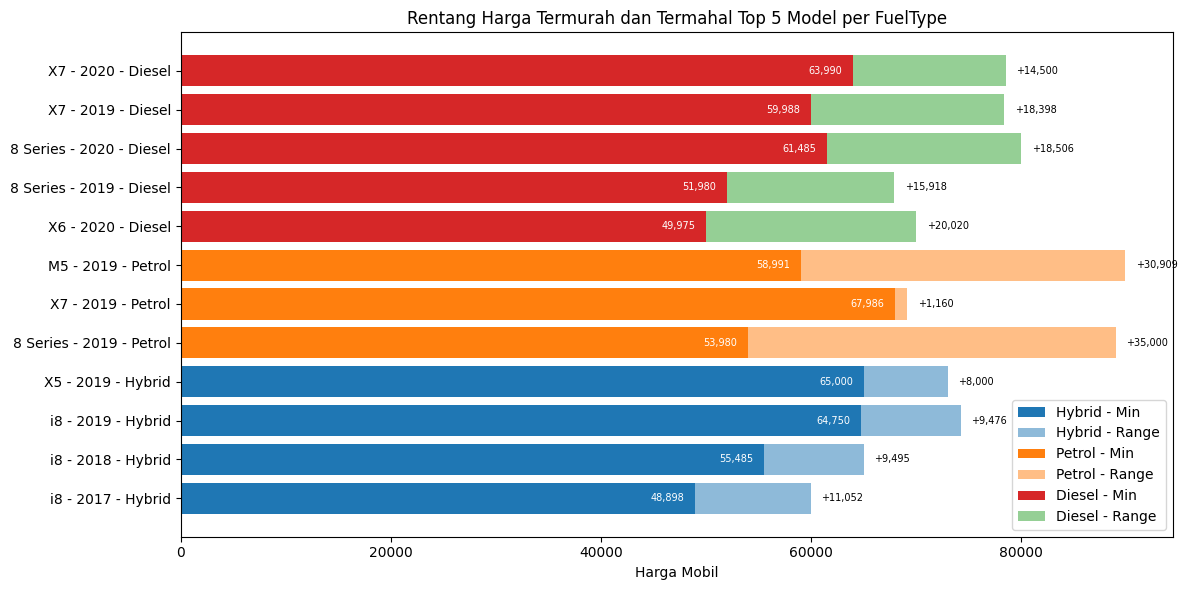

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Tentukan fuelType yang ingin ditampilkan
allowed_fuels = ['Electric', 'Hybrid', 'Petrol', 'Diesel']

# Filter df_summary hanya untuk fuelType yang diizinkan
df_summary_filtered = df_summary[df_summary['fuelType'].isin(allowed_fuels)]
df_summary_filtered = df_summary_filtered.sort_values(by='mean_price')

plt.figure(figsize=(12, 6))

colors = {
    'Electric': '#2ca02c',
    'Hybrid': '#1f77b4',
    'Petrol': '#ff7f0e',
    'Diesel': '#d62728'
}

y_offset = 0
yticks = []
ytick_labels = []
legend_labels = set()

for fuel in allowed_fuels:
    subset = df_summary_filtered[df_summary_filtered['fuelType'] == fuel]
    if subset.empty:
        continue

    y_pos = np.arange(len(subset)) + y_offset

    bars_min = plt.barh(
        y_pos,
        subset['min_price'],
        label=f"{fuel} - Min" if f"{fuel} - Min" not in legend_labels else "",
        color=colors.get(fuel, 'gray')
    )

    
    bars_range = plt.barh(
        y_pos,
        subset['range'],
        left=subset['min_price'],
        label=f"{fuel} - Range" if f"{fuel} - Range" not in legend_labels else "",
        alpha=0.5
    )

    for bar in bars_min:
        plt.text(bar.get_width() - 1000, bar.get_y() + bar.get_height() / 2,
                 f"{int(bar.get_width()):,}", va='center', ha='right', fontsize=7, color='white')

    for bar in bars_range:
        plt.text(bar.get_x() + bar.get_width() + 1000, bar.get_y() + bar.get_height() / 2,
                 f"+{int(bar.get_width()):,}", va='center', ha='left', fontsize=7, color='black')

    yticks.extend(y_pos)
    ytick_labels.extend(subset['model'])
    y_offset += len(subset)
    legend_labels.update({f"{fuel} - Min", f"{fuel} - Max", f"{fuel} - Range"})

plt.yticks(ticks=yticks, labels=ytick_labels)
plt.xlabel('Harga Mobil')
plt.title('Rentang Harga Termurah dan Termahal Top 5 Model per FuelType')
plt.legend()
plt.tight_layout()
plt.show()  

In [21]:
# Menyimpan file excel untuk dilakukan visualisasi pada Tableau
df.to_excel('df12346.xlsx', index=False)
df_summary.to_excel('dfno5.xlsx', index=False)

## **6. Hubungan antara harga per kategori bahan bakar dengan jarak tempuh per kategori bahan bakar?**
___
Berdasarkan hasil data yang diperoleh dari perhitungan rata-rata harga dan rata-rata mileage pada per tipe bahan bakar mobil, saya mengindikasikan pengaruh antara harga dengan mobil jarak tempuh. Pada tahap ini saya melakukan uji semi-inferensial dengan melihat korelasi antar kedua tabel tersebut dan melakukan uji hipotesis terhadap kedua dataset.

Sebelum melakukan perhitungan korelasi, saya menentukan terlebih dahulu apakah data ini lebih cocok untuk menggunakan rumus korelasi tertentu. Maka saya melakukan perhitungan central tendency pada dataframe ini.

In [22]:
# Hitung statistik deskriptif untuk 'price' per fuelType
print("\nStatistik Deskriptif untuk kolom Price per fuelType:")
for fuel, group in df.groupby('fuelType')['price']:
    print(f"\nFuel Type: {fuel}")
    print(f"Rata-rata       : £{group.mean():,.2f}")
    print(f"Median          : £{group.median():,.2f}")
    print(f"Modus           : £{group.mode().iloc[0]:,.2f}")
    print(f"Standar Deviasi : £{group.std():,.2f}")
    print(f"Skewness        : {group.skew():.2f}")
    print(f"Kurtosis        : {group.kurtosis():.2f}")

# Hitung statistik deskriptif untuk 'mileage' per fuelType
print("\nStatistik Deskriptif untuk kolom Mileage per fuelType:")
for fuel, group in df.groupby('fuelType')['mileage']:
    print(f"\nFuel Type: {fuel}")
    print(f"Rata-rata       : {group.mean():,.2f} miles")
    print(f"Median          : {group.median():,.2f} miles")
    print(f"Modus           : {group.mode().iloc[0]:,.2f} miles")
    print(f"Standar Deviasi : {group.std():,.2f}")
    print(f"Skewness        : {group.skew():.2f}")
    print(f"Kurtosis        : {group.kurtosis():.2f}")


Statistik Deskriptif untuk kolom Price per fuelType:

Fuel Type: Diesel
Rata-rata       : £21,779.26
Median          : £19,000.00
Modus           : £14,000.00
Standar Deviasi : £11,194.08
Skewness        : 1.62
Kurtosis        : 4.12

Fuel Type: Electric
Rata-rata       : £18,466.00
Median          : £18,999.00
Modus           : £18,999.00
Standar Deviasi : £923.18
Skewness        : -1.73
Kurtosis        : nan

Fuel Type: Hybrid
Rata-rata       : £27,169.71
Median          : £23,815.50
Modus           : £21,450.00
Standar Deviasi : £12,642.38
Skewness        : 1.65
Kurtosis        : 3.00

Fuel Type: Petrol
Rata-rata       : £24,360.27
Median          : £21,999.00
Modus           : £20,980.00
Standar Deviasi : £11,527.27
Skewness        : 1.56
Kurtosis        : 4.10

Statistik Deskriptif untuk kolom Mileage per fuelType:

Fuel Type: Diesel
Rata-rata       : 29,852.80 miles
Median          : 24,600.00 miles
Modus           : 123.00 miles
Standar Deviasi : 26,386.90
Skewness        : 1.1

Berdasarkan persebearan data rata-rata diatas, saya menggunakan korelasi pearson dikarenakan persebaran data yang cenderung tidak terlalu banyak outliers dengan asumsi distribusi normal. Juga dengan tipe data kontinu dan bukan perangkingan, maka saya menggunakan rumus pearson.

In [23]:
from scipy import stats

# Simpan hasil korelasi per fuelType
correlation_results = []

for fuel, group in df.groupby('fuelType'):
    if group['price'].count() >= 2 and group['mileage'].count() >= 2:
        corr_r, pval_p = stats.pearsonr(group['price'], group['mileage'])
        correlation_results.append({
            'fuelType': fuel,
            'pearson_r': corr_r,
            'p_value': pval_p
        })

# Ubah ke DataFrame untuk ditampilkan rapi
df_corr = pd.DataFrame(correlation_results)
print(df_corr)


   fuelType  pearson_r        p_value
0    Diesel  -0.639716   0.000000e+00
1  Electric  -0.847906   3.557264e-01
2    Hybrid  -0.534660   1.968361e-23
3    Petrol  -0.532453  1.528664e-249


Berdasarkan perhitungan korelasi yang didapatkan saya dapat menyimpulkan beberapa hal:

1. Diesel : Memiliki korelasi negatif kuat dengan hubungan yang signifikan antara harga dengan jarak tempuh. 
2. EV : Memiliki korelasi negatif yang kuat namun tidak signifikan. Hal ini bisa dipicu karena data yang sedikit (3 data).
3. Hybrid : Memiliki korelasi secara negatif dengan tingkat signifikansi kuat. 
4. Bensin : Memiliki korelasi secara negatif dengan tingkat signifikansi kuat.

Mobil Diesel sangat terpengaruh terhadap jarak tempuh mobil. Disisi lain mobil hybrid dan bensin juga menurun namun tidak separah mobil diesel. Selain itu mobil EV tidak memiliki cukup data, maka korelasi belum bisa dibuktikan secara signifikan.

C:\Users\rafiu\AppData\Local\Temp\ipykernel_9712\503945667.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fuelType', y='pearson_r', data=df, palette='coolwarm')


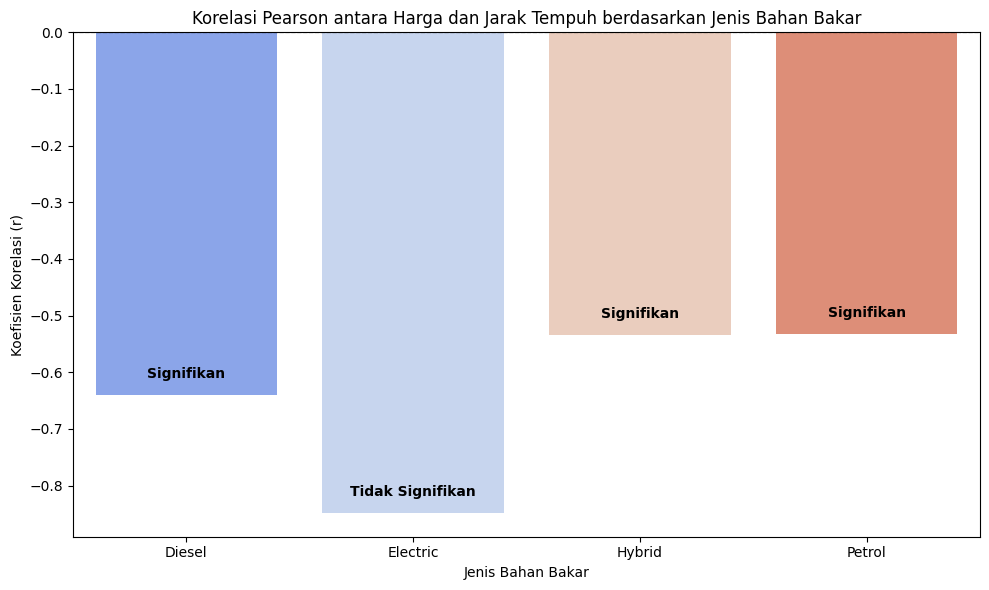

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data korelasi
data = {
    'fuelType': ['Diesel', 'Electric', 'Hybrid', 'Petrol'],
    'pearson_r': [-0.639716, -0.847906, -0.534660, -0.532453],
    'p_value': [0.000000e+00, 3.557264e-01, 1.968361e-23, 1.528664e-249]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='fuelType', y='pearson_r', data=df, palette='coolwarm')

# Menandai signifikan atau tidak berdasarkan p-value
for i, row in df.iterrows():
    signif = 'Signifikan' if row['p_value'] < 0.05 else 'Tidak Signifikan'
    plt.text(i, row['pearson_r'] + 0.03, signif, ha='center', fontsize=10, weight='bold')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Korelasi Pearson antara Harga dan Jarak Tempuh berdasarkan Jenis Bahan Bakar')
plt.ylabel('Koefisien Korelasi (r)')
plt.xlabel('Jenis Bahan Bakar')
plt.tight_layout()
plt.show()

## **CONCLUSION**
___

Terdapat beberapa kesimpulan yang saya dapatkan:

1. Harga mobil dengan bahan bakar diesel lebih menguntungkan secara harga, namun tidak secara jarak tempuh dan tingkat keborosan. Secara overall harga mobil dengan bahan bakar bensin lebih baik secara keseluruhan untuk kategori mobil tipe NON-EV.
2. Berdasarkan hasil nilai confidence interval, top 5 model mobil pada tiap bahan bakar. Nilai return paling bear untuk mobil diesel ada pada series M5 Petrol keluaran tahun 2019 dan 8 Series 2019 Petrol. Untuk Mobil Diesel ada pada seires X6 keluaran tahun 2020. Untuk hybrid dipilih mobil i8 keluaran tahun 2017 dan i8 2019 . Untuk mobil EV i3 keluaran tahun 2016.
3. Pemilihan unit mobil diatas berdasarkan observasi atas hasil korelasi hubungan harga dan mileage mobil per tipe bensin, juga dengan insight-insight dari harga mobil, mileage, serta cc tiap mobil dari kategori mobil murah sampai mahal. Selebihnya, hasil analisa akan diberikan kepada perusahaan untuk selanjutnya di jadikan pertimbangan lanjutan. 